In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# warnings.filterwarnings('ignore')


In [4]:
pd = pd.read_csv('/home/suraj/Desktop/myfirstmlproject/firstmlproject/notebook/stud.csv')

In [18]:
pd.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
pd.shape

(1000, 8)

Data checks to perform

1.missing values
2.duplicates
check data type
check the number of unique values of each column
check statistic of data set
check various categories present in the different categorical column

In [6]:
#check missing values

pd.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
#check duplicates

pd.duplicated().sum()

0

In [8]:
#check data types

pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
#checking the number of unique values of each column

pd.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
#check statistic of data

pd.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
#More EDA

print("categoris in 'gender' variable:      ",end="")
print (pd['gender'].unique())

print("categoris in 'race_ethnicity' variable:      ",end="")
print (pd['race_ethnicity'].unique())

print("categoris in 'parental_level_of_education' variable:      ",end="")
print (pd['parental_level_of_education'].unique())

print("categoris in 'lunch' variable:      ",end="")
print (pd['lunch'].unique())

print("categoris in 'test_preparation_course' variable:      ",end="")
print (pd['test_preparation_course'].unique())

categoris in 'gender' variable:      ['female' 'male']
categoris in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
categoris in 'parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categoris in 'lunch' variable:      ['standard' 'free/reduced']
categoris in 'test_preparation_course' variable:      ['none' 'completed']


In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in pd.columns if pd[feature].dtype != 'O']
categorical_features = [feature for feature in pd.columns if pd[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
pd.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [37]:
pd.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

Feature Engineering
Adding Columns for "Total Score" and "Average"

In [18]:
pd['Total Score'] = pd['math_score'] + pd['reading_score'] + pd['writing_score']
pd['average'] = pd['Total Score']/3
pd.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
math_full = pd[pd['math_score'] == 100]['average'].count()
writing_full = pd[pd['writing_score'] == 100]['average'].count()
reading_full = pd[pd['reading_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [25]:
math_less_20 = pd[pd['math_score'] <= 20]['average'].count()
writing__less_20 = pd[pd['writing_score'] <= 20]['average'].count()
reading_less_20 = pd[pd['reading_score'] <= 20]['average'].count()

print(f'Number of students with less then 20 marks in Maths: {math_less_20}')
print(f'Number of students with fless then 20 marks  in Writing: {writing__less_20}')
print(f'Number of students with less then 20 marks in Reading: {reading_less_20}')

Number of students with less then 20 marks in Maths: 4
Number of students with fless then 20 marks  in Writing: 3
Number of students with less then 20 marks in Reading: 1


Histogram & KDE

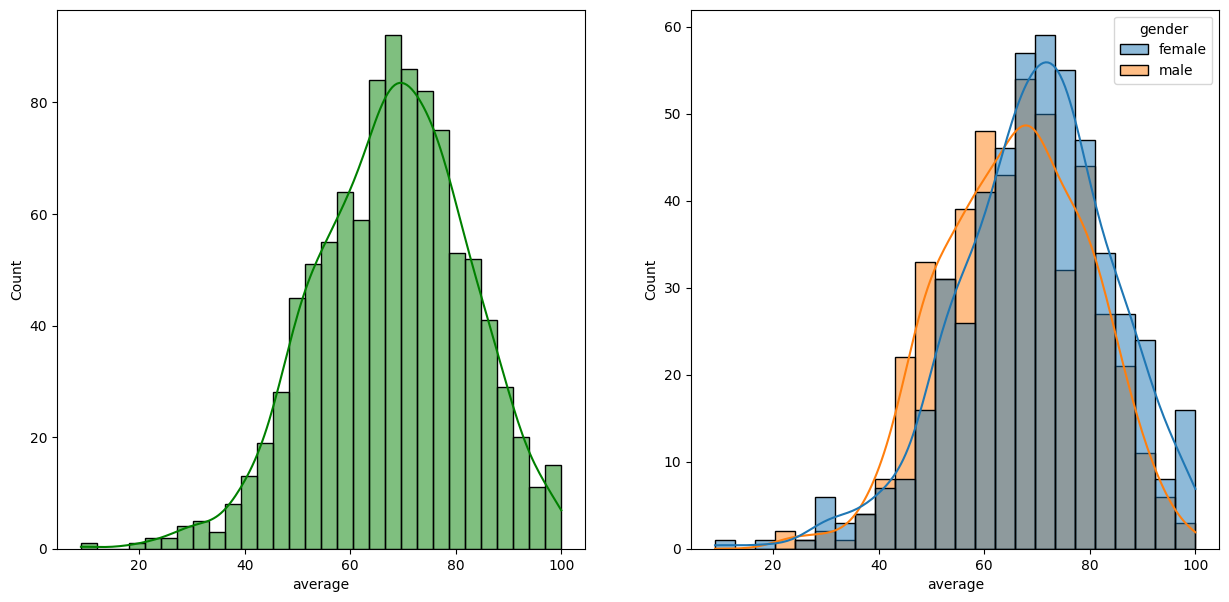

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=pd,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=pd,x='average',kde=True,hue='gender')
plt.show()

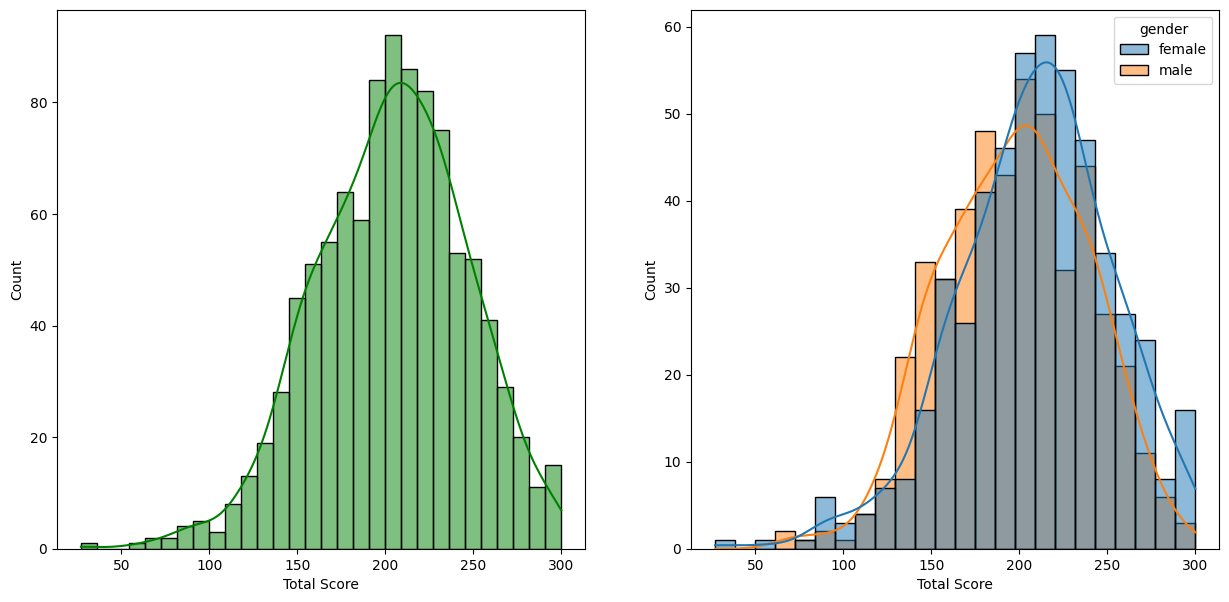

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=pd,x='Total Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=pd,x='Total Score',kde=True,hue='gender')
plt.show()

Insights

Female students tend to performs well then male students

/tmp/ipykernel_21684/557851718.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
/tmp/ipykernel_21684/557851718.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
/tmp/ipykernel_21684/557851718.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


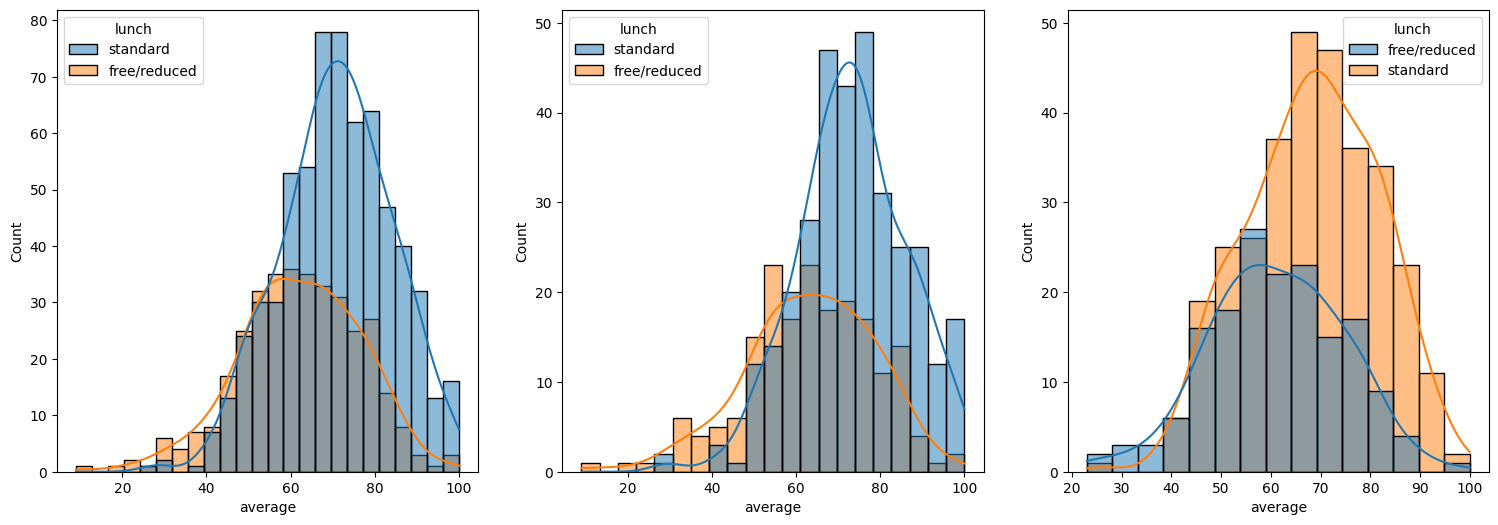

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=pd,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=pd[pd.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=pd[pd.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights

Standards lunch helps perfomr well in exams
Standard lunch helps perform well in exams be it male or female

/tmp/ipykernel_21684/3550427144.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
/tmp/ipykernel_21684/3550427144.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
/tmp/ipykernel_21684/3550427144.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


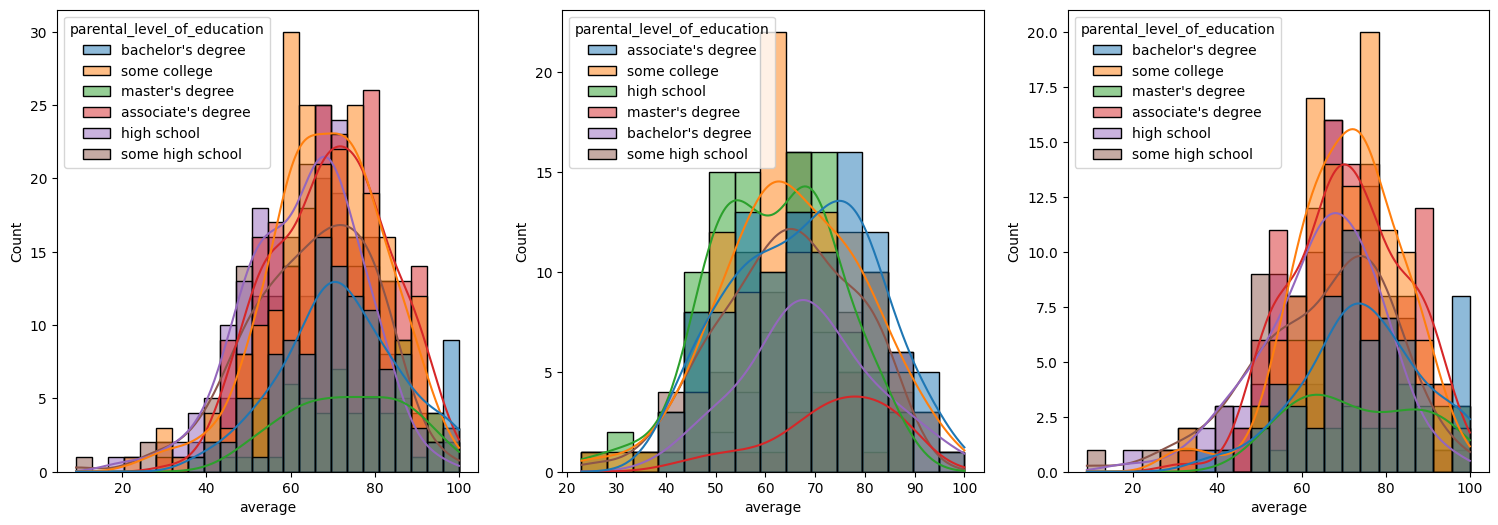

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=pd,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=pd[pd.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=pd[pd.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

/tmp/ipykernel_21684/2443654059.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
/tmp/ipykernel_21684/2443654059.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
/tmp/ipykernel_21684/2443654059.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


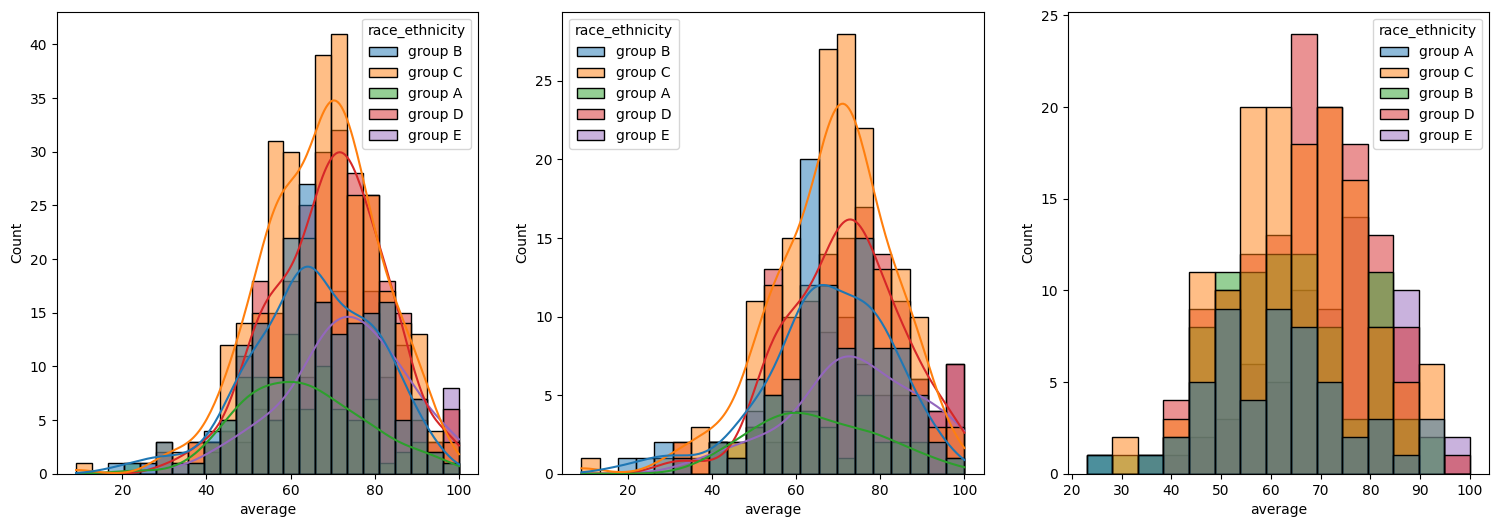

In [41]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=pd,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=pd[pd.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=pd[pd.gender=='male'],x='average',kde=False,hue='race_ethnicity')
plt.show()

Insights in parental_level_of_education.

1. In general parent's education don't help student perform well in exam.
2. 2nd plot shows that parent's whose education is of associates degree or master degree their male child tend to perfrom well in exam.
3. 3rd plot we can see there is no effect of parent's education on female students.

Insghts in race_ethencity

1. Students of group A and group B tends to perfornm poorly in exam
2. Students of group A and group B tends to perfrom poortly in exam irrespectively of wether they are male or female

Maximum score of students in all three subjects.

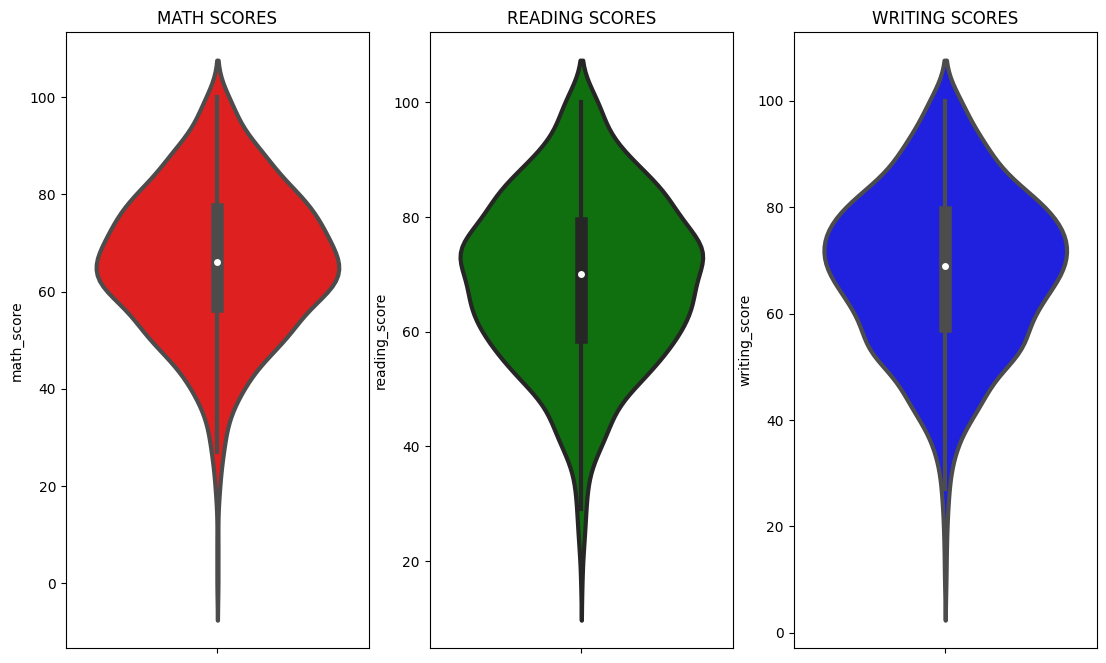

In [43]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=pd,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=pd,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=pd,color='blue',linewidth=3)
plt.show()

Insights

From the above three plots its clearly visible that most of the students score between 60-80 in Maths where as in reading and writing most of them score from 50-80


Multivariate analysis using pieplot

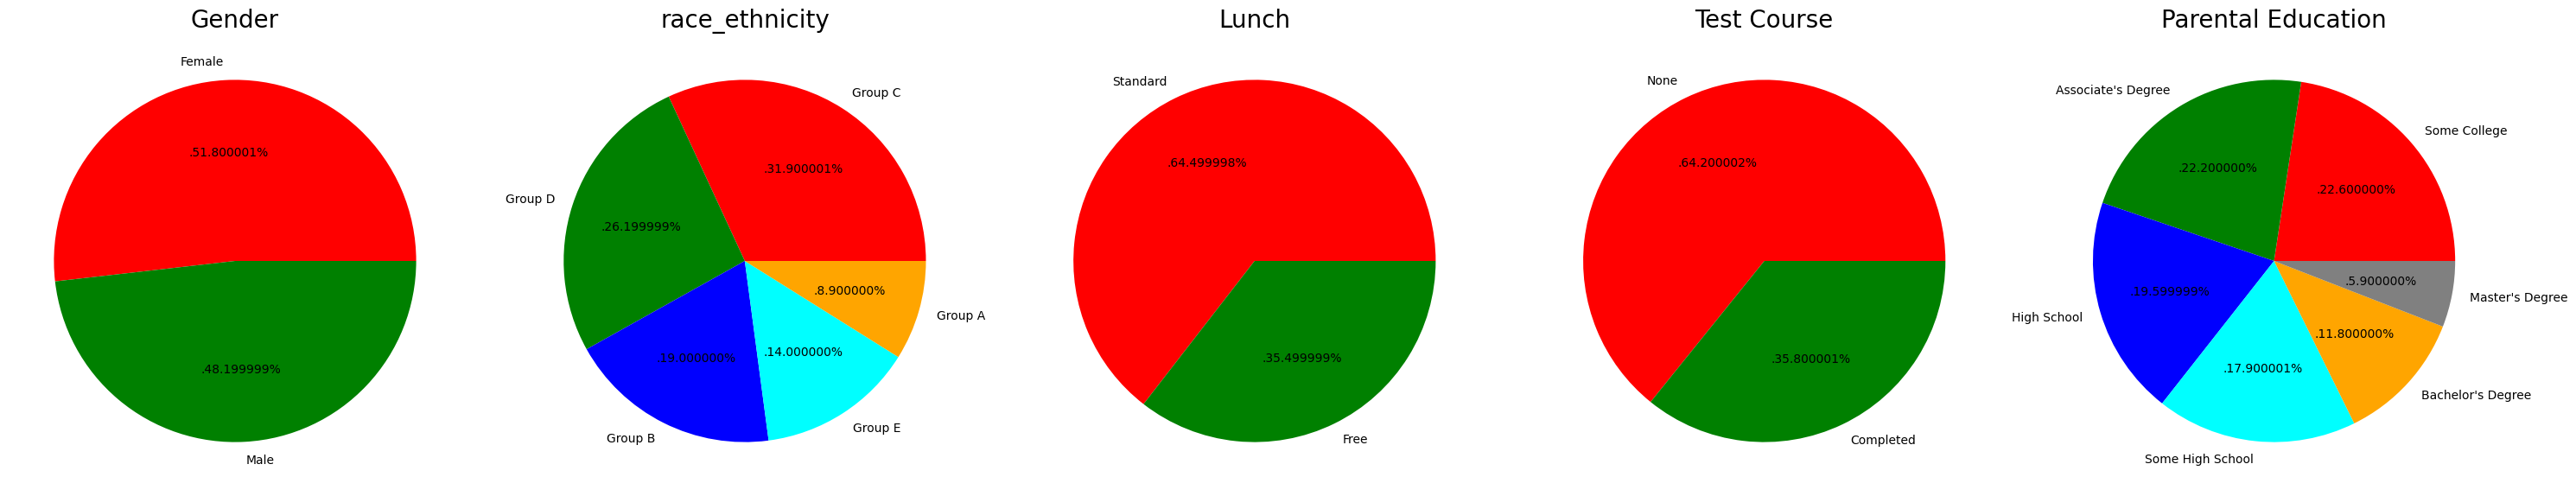

In [45]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = pd['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = pd['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = pd['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = pd['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = pd['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights

1. Number of male and female students is almmost equal
2. number of students are greater in group C
3. number of students who have standard lunch are greater
4. Number of students who have not enrolled in any test preparation course is greater.
5. Number of students whose parental education is "Some college" is greater followed closely by "Associate Degree"

Feature Wise Visualization

1.1. Gender Column

How is distributiomn of Gender

Is gender has any impact on students performance

univariatie analysis

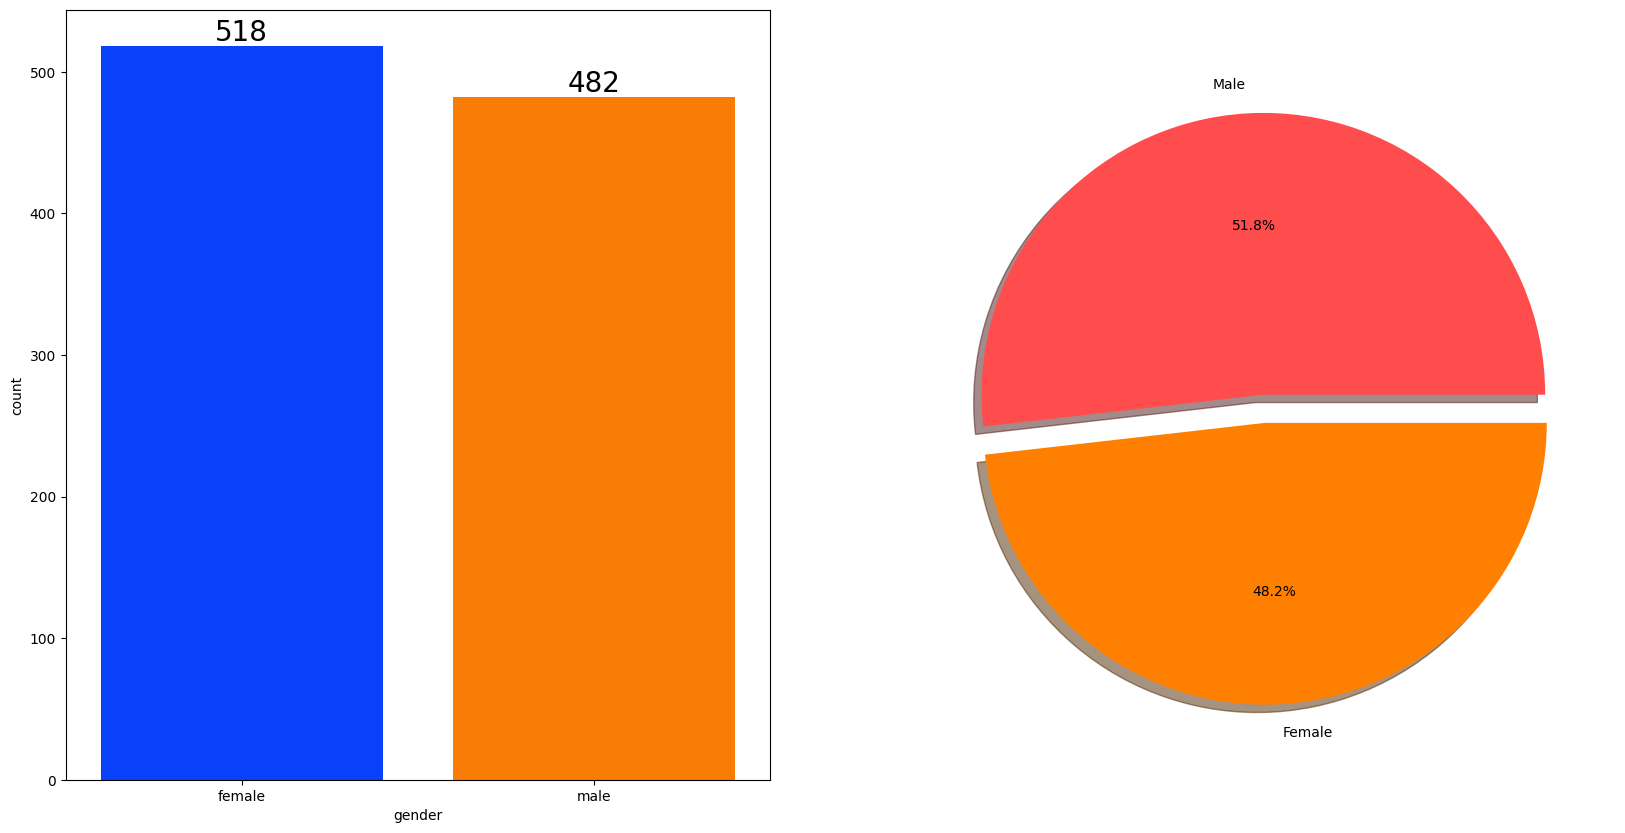

In [46]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=pd['gender'],data=pd,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=pd['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights

Gender has balanced data with female students are 518 (48%) and male students are 482(52%)

Bivariate Analysis (is gender has any impact on students performance?)

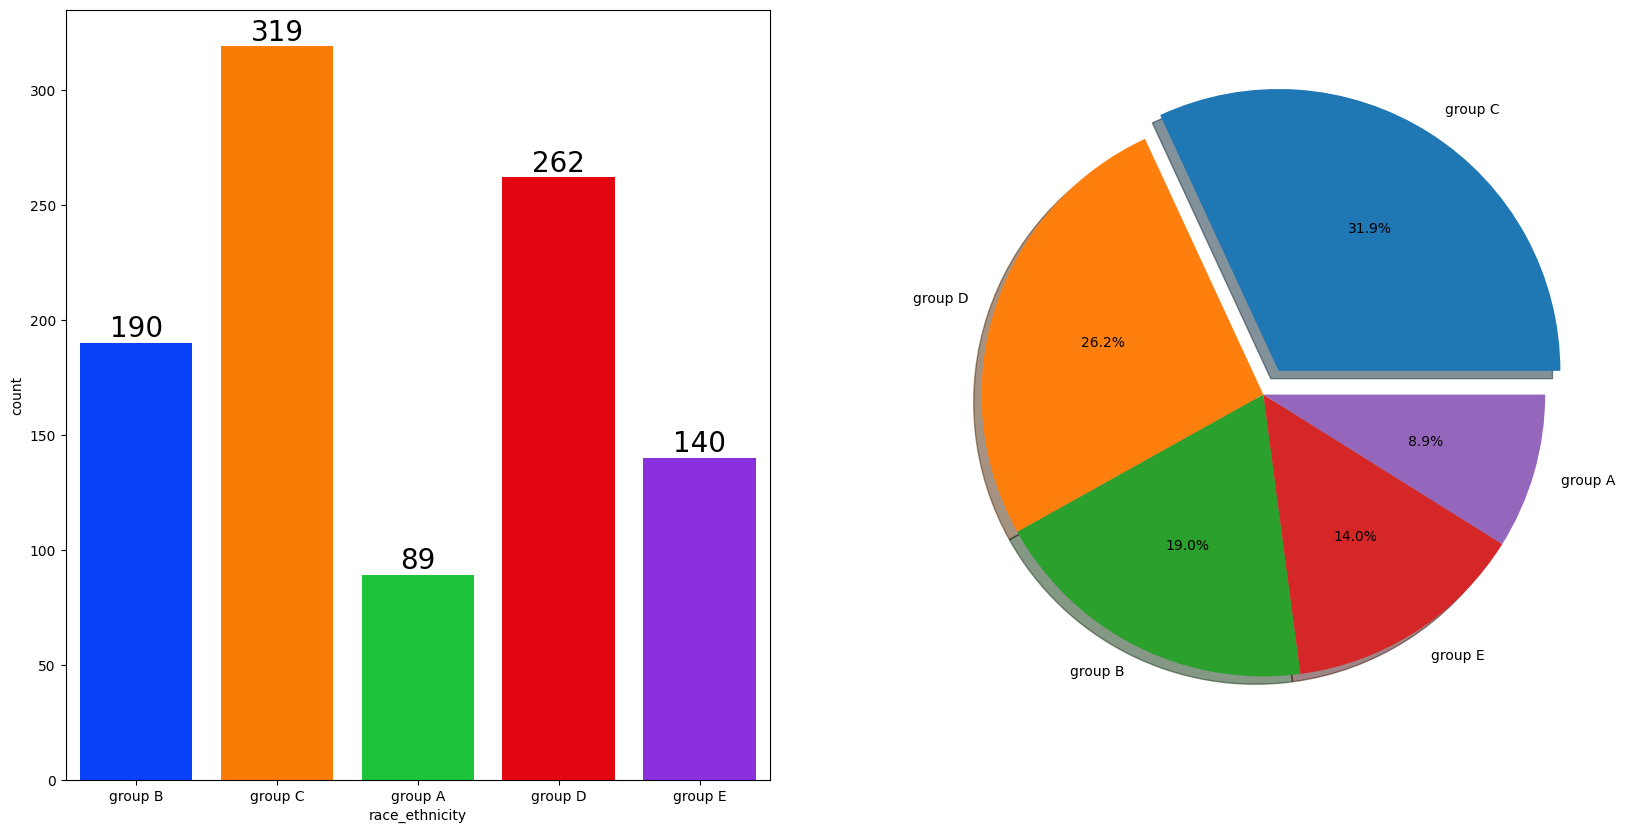

In [55]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=pd['race_ethnicity'],data=pd,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = pd['race_ethnicity'].value_counts(),labels=pd['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

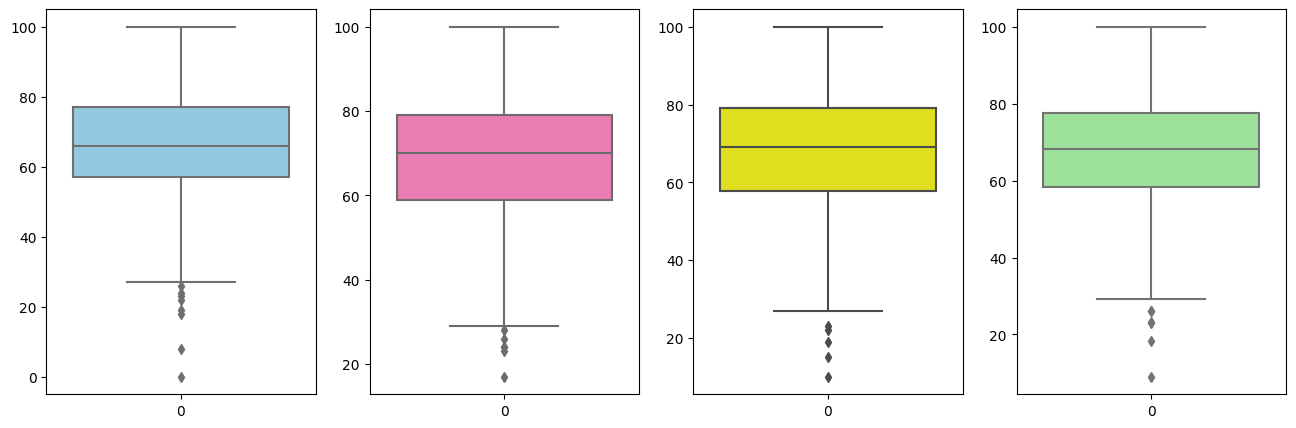

In [57]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(pd['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(pd['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(pd['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(pd['average'],color='lightgreen')
plt.show()

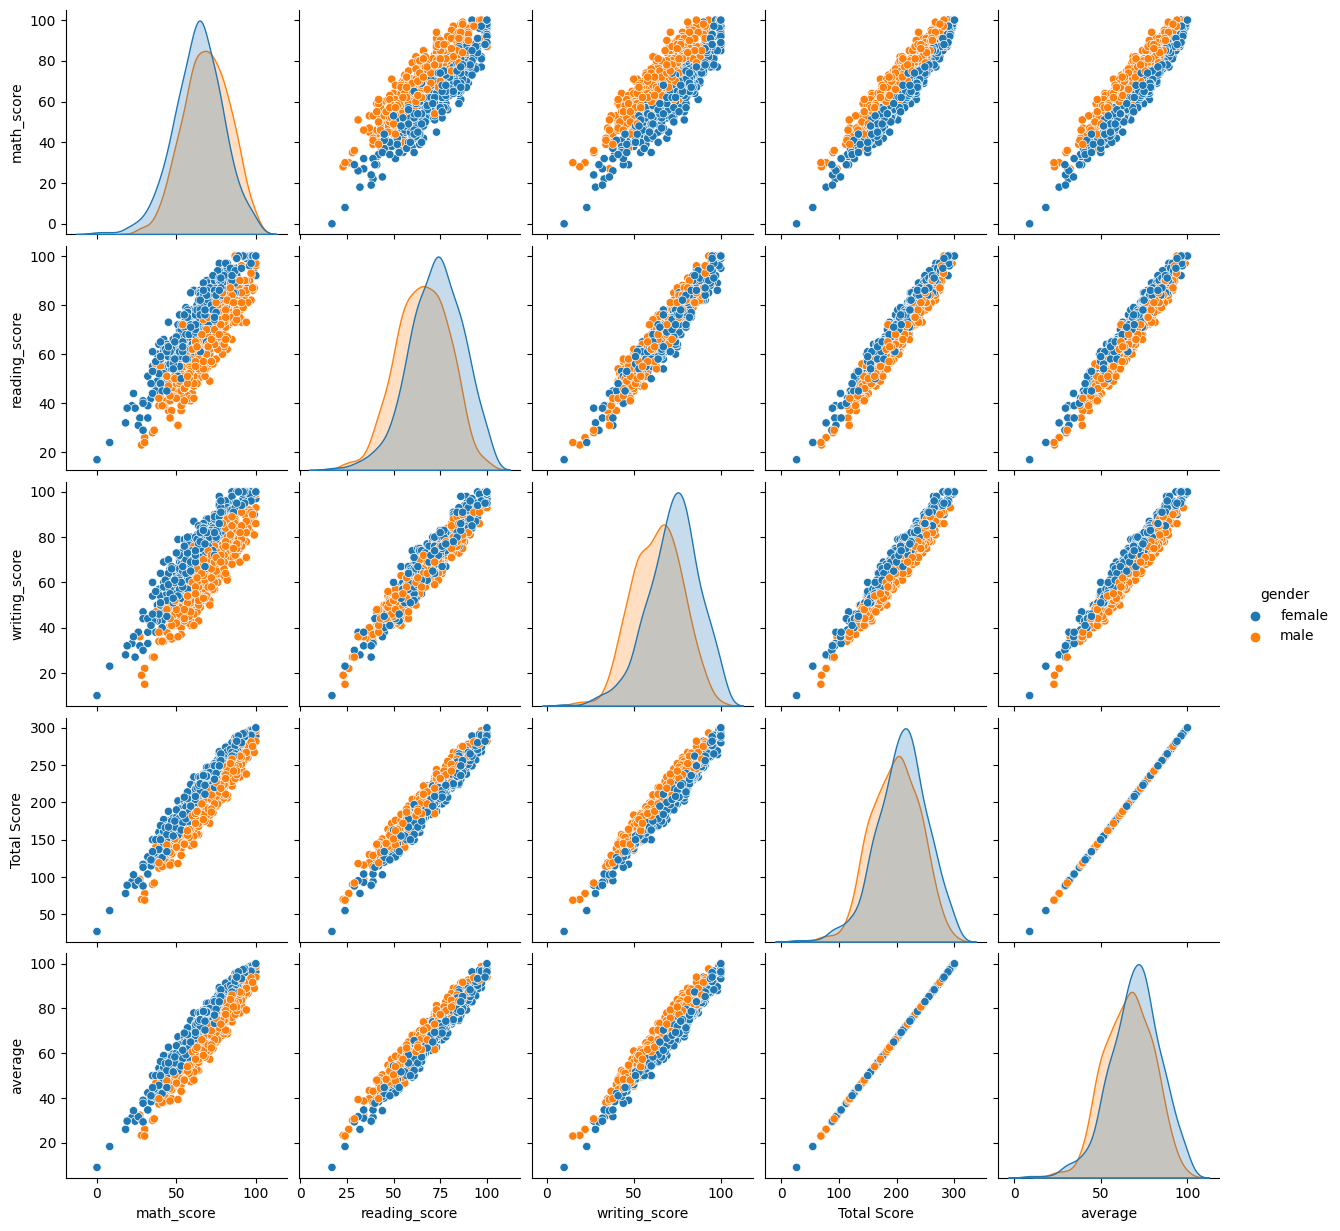

In [58]:
sns.pairplot(pd,hue = 'gender')
plt.show()

Insights

From the above plot it is clear that all the scores increase linesrly with each other

Conclusion:

1. Students performance is related with lunch, race, parental level education
2. females lead in pass percentage ans also are top-scorers
3. students performance is not much related with test preparation
4. finishing preparation course is benefitial.
